
# Linear Regression with Means Squared Error 

### Normal Method

#### Import Statements.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Generate synthetic data.

In [4]:
np.random.seed(42)
x = np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

#### Split into training and testing sets

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(x_test)

In [10]:
print(f"Coefficents {model.coef_}")
print(f"Intercept {model.intercept_}")
print(f"Mean Squared Error {mean_squared_error(y_test, y_pred)}")

Coefficents [[2.59864731]]
Intercept [4.14291332]
Mean Squared Error 0.653699513717002


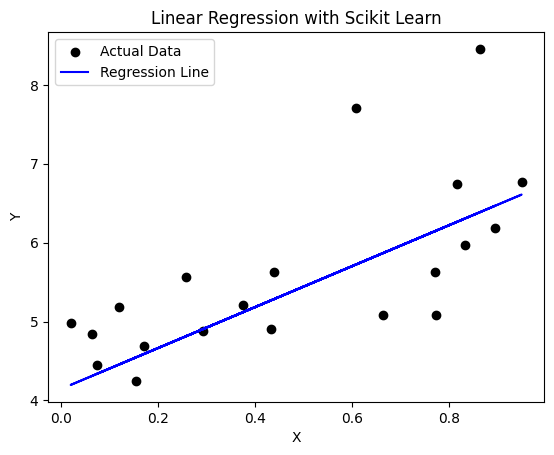

In [12]:
plt.scatter(x_test, y_test, color = "black", label="Actual Data")
plt.plot(x_test, y_pred, color="blue", label="Regression Line")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Scikit Learn')
plt.legend()
plt.show()

## Using Tensorflow

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

2024-02-05 15:52:17.453241: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-05 15:52:17.511008: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-05 15:52:17.511047: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-05 15:52:17.512758: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-05 15:52:17.522334: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-05 15:52:17.523325: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [14]:
class LinearRegressionModel(tf.Module):
    def __init__(self):
        self.W = tf.Variable(tf.random.normal([1, 1]), name="weight")
        self.b = tf.Variable(tf.zeros([1]), name="bias")
    def __call__(self, x):
        return tf.matmul(x, self.W, transpose_b=True) + self.b
model = LinearRegressionModel()

# Define the mean squared error loss function
def mean_squared_error_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Define the optimization algorithm (Gradient Descent)
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        y_pred = model(X_train_tf)
        loss = mean_squared_error_loss(y_train_tf, y_pred)

    gradients = tape.gradient(loss, model.trainable_variables)

    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

if epoch % 10 == 0:
    print(f"Epoch {epoch}, Loss: {loss.numpy()}")

# Make predictions on the test set
y_pred_tf = model(X_test_tf)

# Convert TensorFlow tensors to NumPy arrays for evaluation
y_test_np = y_test_tf.numpy()
y_pred_np = y_pred_tf.numpy()

# Evaluate the model
mse_tf = mean_squared_error(y_test_np, y_pred_np)
print("Mean Squared Error (TensorFlow):", mse_tf)

# Plot the regression line
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, y_pred_np, color='blue', linewidth=3, label='Regression Line (TensorFlow)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with TensorFlow')
plt.legend()
plt.show()

NameError: name 'X_train_tf' is not defined